In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Manish\\Downloads\\diabetes (2).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

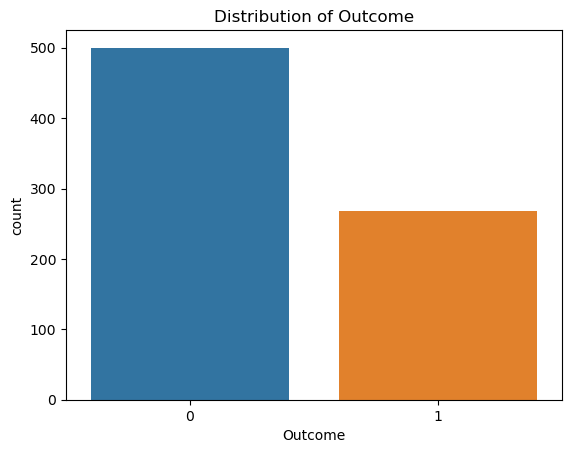

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Outcome"])
plt.title("Distribution of Outcome")
plt.show()


In [4]:
X=df.drop(["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Fitting classifier to the Training set
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
recall = recall_score(y_test, y_pred, average='weighted')
recall

[[86 21]
 [18 29]]


0.7467532467532467

In [12]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
recall = recall_score(y_test, y_pred, average='weighted')
recall

[[95 12]
 [20 27]]


0.7922077922077922

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with best parameters
rf = RandomForestClassifier(
    max_depth=20, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=100, 
    random_state=42  # To ensure reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)

recall = recall_score(y_test, y_pred, average='weighted')
recall

Random Forest Accuracy: 0.8246753246753247
[[95 12]
 [15 32]]


0.8246753246753247

In [17]:
import seaborn as sns
# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to visualize feature importance
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df
feature_importance


array([0.0739518 , 0.27951233, 0.0822254 , 0.0609634 , 0.06591558,
       0.17682439, 0.12446391, 0.1361432 ])

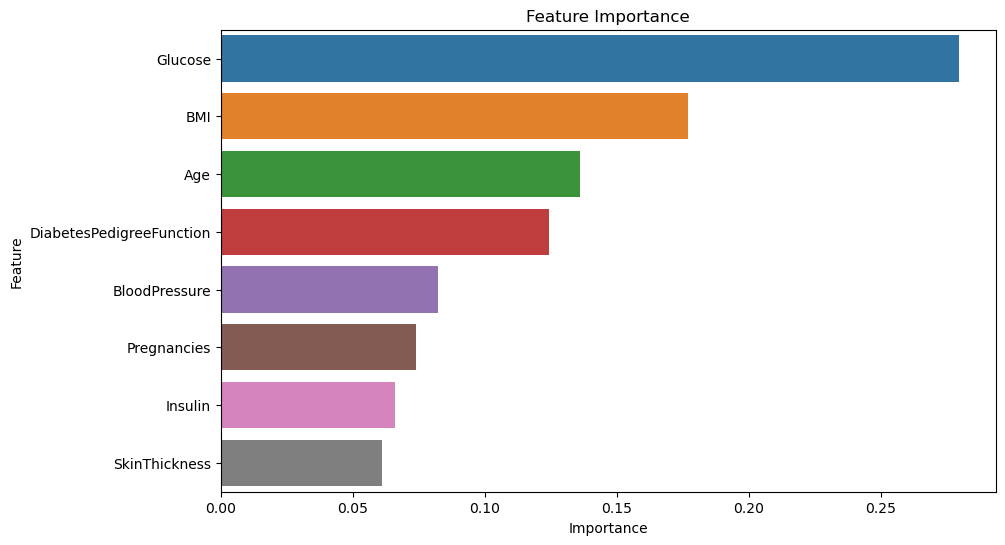

In [18]:
import seaborn as sns

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

recall = recall_score(y_test, y_pred, average='weighted')
recall

XGBoost Accuracy: 0.8311688311688312
[[92 15]
 [11 36]]


0.8311688311688312

In [20]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model on the training data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

recall = recall_score(y_test, y_pred, average='weighted')
recall

[[98  9]
 [18 29]]


0.8246753246753247

In [21]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) #the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score', accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average='weighted')
recall

[[98  9]
 [18 29]]
accuracy_score 0.8246753246753247


0.8246753246753247

In [22]:
# Set up parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'degree': [3, 4, 5],
    'coef0': [0, 1]
}
# Initialize the SVC model instance
svc = SVC(random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Perform Cross-Validation
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the best model
best_svc = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svc.predict(X_test)

# Evaluate the model
print("SVC Test Accuracy:", accuracy_score(y_test, y_pred))


Cross-Validation Scores: [0.73170732 0.74796748 0.76422764 0.69918699 0.77868852]
Mean Cross-Validation Accuracy: 0.7443555910968945
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'C': 10, 'coef0': 0, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7639077702252433
SVC Test Accuracy: 0.8181818181818182


In [27]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(C=10, coef0=0, degree=3, gamma=0.01, kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) #the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score', accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average='weighted')
recall

[[99  8]
 [20 27]]
accuracy_score 0.8181818181818182


0.8181818181818182

In [30]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score', accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average='weighted')
recall

[[99  8]
 [22 25]]
accuracy_score 0.8051948051948052


0.8051948051948052

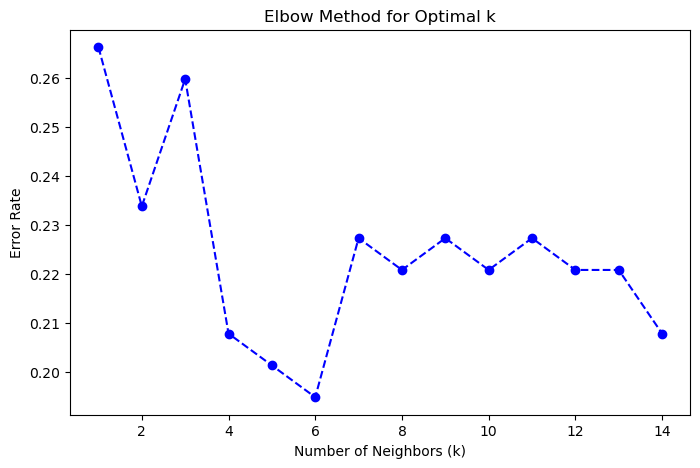

In [29]:
import matplotlib.pyplot as plt
error_rates = []
k_values = range(1, 15)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [31]:
X.drop(["Pregnancies","Insulin","SkinThickness"],axis=1)

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
4,137,40,43.1,2.288,33
...,...,...,...,...,...
763,101,76,32.9,0.171,63
764,122,70,36.8,0.340,27
765,121,72,26.2,0.245,30
766,126,60,30.1,0.349,47


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with best parameters
rf = RandomForestClassifier(
    max_depth=20, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42  # To ensure reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
recall = recall_score(y_test, y_pred, average='weighted')
recall

Random Forest Accuracy: 0.8246753246753247


0.8246753246753247

In [35]:
bins = [0, 70, 100, 125, 200]  # Adjust as needed
labels = ['Low', 'Normal', 'Prediabetic', 'Diabetic']

# Create the new Glucose category column
X['Glucose_category'] = pd.cut(X['Glucose'], bins=bins, labels=labels, right=False)

bins = [0, 18.5, 24.9, 29.9, 40, 70]  # Covering BMI values up to 67.1
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Very Obese']

# Create the BMI_category column
X['BMI_category'] = pd.cut(X['BMI'], bins=bins, labels=labels, right=False)


In [36]:
X=pd.get_dummies(X)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_category_Low,Glucose_category_Normal,Glucose_category_Prediabetic,Glucose_category_Diabetic,BMI_category_Underweight,BMI_category_Normal,BMI_category_Overweight,BMI_category_Obese,BMI_category_Very Obese
0,6,148,72,35,0,33.6,0.627,50,0,0,0,1,0,0,0,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0,0,1,0,0
2,8,183,64,0,0,23.3,0.672,32,0,0,0,1,0,1,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0,0,0,1,0,0
4,0,137,40,35,168,43.1,2.288,33,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1,0,0,0,0,1,0
764,2,122,70,27,0,36.8,0.340,27,0,0,1,0,0,0,0,1,0
765,5,121,72,23,112,26.2,0.245,30,0,0,1,0,0,0,1,0,0
766,1,126,60,0,0,30.1,0.349,47,0,0,0,1,0,0,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with best parameters
rf = RandomForestClassifier(
    max_depth=10, 
    min_samples_leaf=5, 
    min_samples_split=5, 
    n_estimators=100, 
    random_state=42  # To ensure reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.8051948051948052

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average='weighted')
recall

XGBoost Accuracy: 0.8246753246753247


0.8246753246753247

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_resampled.value_counts()}")

# Train a model (e.g., Random Forest) on resampled data
rf = RandomForestClassifier(
    max_depth=20, 
    min_samples_leaf=5, 
    min_samples_split=5, 
    n_estimators=200, 
    random_state=42  # To ensure reproducibility
)
rf.fit(X_resampled, y_resampled)

# Evaluate
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy after SMOTE: {acc:.2%}")
print(f"Recall after SMOTE: {recall:.2%}")


Original dataset shape: 0    400
1    214
Name: Outcome, dtype: int64
Resampled dataset shape: 0    400
1    400
Name: Outcome, dtype: int64
Accuracy after SMOTE: 74.68%
Recall after SMOTE: 72.22%


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)

y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy after SMOTE: {acc_lr:.2%}")
print(f"Logistic Regression - Recall after SMOTE: {recall_lr:.2%}")


Logistic Regression - Accuracy after SMOTE: 72.08%
Logistic Regression - Recall after SMOTE: 75.93%


C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.svm import SVC

svm= SVC(C=10, coef0=0, degree=3, gamma=0.01, kernel='rbf', random_state=0)
svm.fit(X_resampled, y_resampled)

y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("\nConfusion Matrix:\n", conf_matrix)

print(f"SVM - Accuracy after SMOTE: {acc_svm:.2%}")
print(f"SVM - Recall after SMOTE: {recall_svm:.2%}")



Confusion Matrix:
 [[88 12]
 [42 12]]
SVM - Accuracy after SMOTE: 64.94%
SVM - Recall after SMOTE: 22.22%


In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("\nConfusion Matrix:\n", conf_matrix)

print(f"XGBoost - Accuracy after SMOTE: {acc_xgb:.2%}")
print(f"XGBoost - Recall after SMOTE: {recall_xgb:.2%}")



Confusion Matrix:
 [[79 21]
 [16 38]]
XGBoost - Accuracy after SMOTE: 75.97%
XGBoost - Recall after SMOTE: 70.37%


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_resampled, y_resampled)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print(f"KNN - Accuracy after SMOTE: {acc_knn:.2%}")
print(f"KNN - Recall after SMOTE: {recall_knn:.2%}")


KNN - Accuracy after SMOTE: 66.23%
KNN - Recall after SMOTE: 61.11%


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameters for tuning
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for Recall Optimization
grid_log = GridSearchCV(log_reg, log_params, cv=5, scoring='recall', n_jobs=-1)
grid_log.fit(X_resampled, y_resampled)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)

# Best parameters and recall score
print("Best Logistic Regression Params:", grid_log.best_params_)
print("Best Recall for Logistic Regression:", grid_log.best_score_)



Confusion Matrix:
 [[76 24]
 [13 41]]
Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l1'}
Best Recall for Logistic Regression: 0.7825


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV for Recall Optimization
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='recall', n_jobs=-1)
grid_rf.fit(X_resampled, y_resampled)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)


# Best parameters and recall score
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Recall for Random Forest:", grid_rf.best_score_)



Confusion Matrix:
 [[76 24]
 [15 39]]
Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall for Random Forest: 0.86


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV for Recall Optimization
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='recall', n_jobs=-1)
grid_rf.fit(X_resampled, y_resampled)

# Best parameters and recall score
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Recall for Random Forest:", grid_rf.best_score_)

# Predict on test set using the best model
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


# Print Recall and Accuracy for test set
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Recall on Test Set: {recall:.2%}")
print(f"Accuracy on Test Set: {accuracy:.2%}")


Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall for Random Forest: 0.86

Confusion Matrix:
 [[76 24]
 [13 41]]
Recall on Test Set: 75.93%
Accuracy on Test Set: 75.97%
